In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from src.black_scholes import CallPut, bs_price
from src.replication import ReplicatingPortfolio, VolatilityMeasure

In [12]:
# Setup the experiment constants 

n_sims = 2**8            # Number of simulations
S0 = 100                  # Initial stock price
r = 0.02                 # Risk free rate
sigma_a = 0.35           # Actual Volatility
sigma_i = 0.2            # Implied Volatility
T = 1                    # Time to maturity
K = 100                  # Strike price
call_put = CallPut.CALL  # Option type
k = 8                    # Used to calulate the number of steps in the simulation

bs_prc_a = bs_price(S0, K, r, sigma_a, T, call_put) # Black-Scholes price using actual volatility
bs_prc_i = bs_price(S0, K, r, sigma_i, T, call_put) # Black-Scholes price using implied volatility

theoretical_pnl = bs_prc_a - bs_prc_i  # Theoretical PNL if hedging with the actual volatility

In [13]:
# Run a number of different path projections for the evolution of the underlying
replicating_portfolio = ReplicatingPortfolio.from_monte_carlo(
    T=T, 
    k=k, 
    S0=S0, 
    sigma_a=sigma_a, 
    sigma_i=sigma_i, 
    r=r, 
    K=K,
    n_sims=n_sims,
    call_put=call_put
)

In [14]:

# Calculate the PNL if the the options is hedged using actual volatility
actual_portfolio = replicating_portfolio.portfolio(VolatilityMeasure.ACTUAL)
actual_pnl = replicating_portfolio.calculate_pnl(actual_portfolio)
print(f"Actual PNL. Mean: {actual_pnl['PnL'][:, -1].mean()}, STD: {actual_pnl['PnL'][:, -1].std()}")

Actual PNL. Mean: 5.979655999857409, STD: 0.8340967029017557


In [15]:
# Calculate the PNL if the the options is hedged using implied volatility
implied_portfolio = replicating_portfolio.portfolio(VolatilityMeasure.IMPLIED)
implied_pnl = replicating_portfolio.calculate_pnl(implied_portfolio)
print(f"Implied PNL. Mean: {implied_pnl['PnL'][:, -1].mean()}, STD: {implied_pnl['PnL'][:, -1].std()}")

Implied PNL. Mean: 5.920765027304449, STD: 3.080289270335655


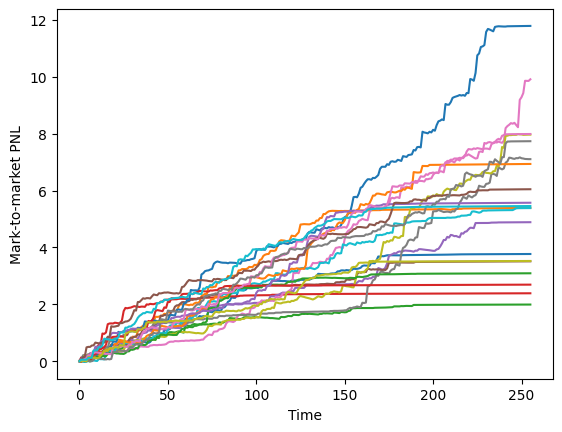

In [16]:
df = pd.DataFrame(implied_pnl['PnL'].T[:, :20])
plt.plot(df)
plt.xlabel('Time')
plt.ylabel('Mark-to-market PNL')
plt.show()

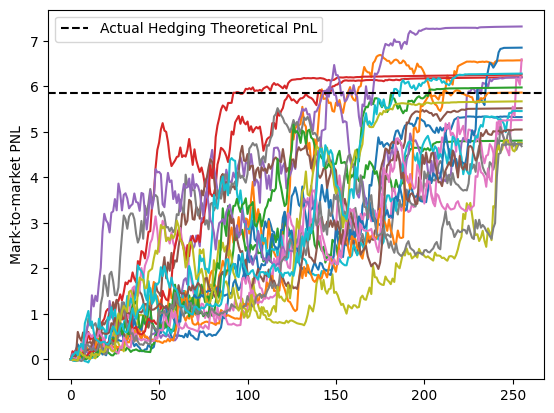

In [17]:
df = pd.DataFrame(actual_pnl['PnL'].T[:, :20])
plt.plot(df)
plt.axhline(y=theoretical_pnl, color='black', linestyle='--', label='Actual Hedging Theoretical PnL')
plt.legend()
plt.ylabel('Mark-to-market PNL')
plt.show()

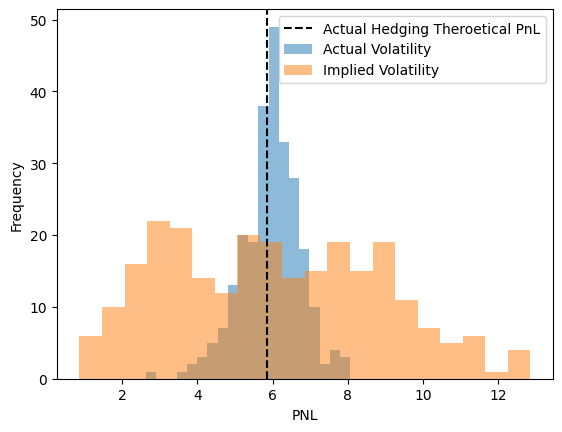

In [9]:
import matplotlib.pyplot as plt

# Get the final values from the actual PnL
final_values_actual = actual_pnl['PnL'][:, -1]

# Get the final values from the implied PnL
final_values_implied = implied_pnl['PnL'][:, -1]

# Plot the distribution of final values
plt.hist(final_values_actual, bins=20, alpha=0.5, label='Actual Volatility')
plt.hist(final_values_implied, bins=20, alpha=0.5, label='Implied Volatility')

plt.axvline(x=theoretical_pnl, color='black', linestyle='--', label='Actual Hedging Theroetical PnL')
plt.xlabel('PNL')
plt.ylabel('Frequency')
plt.legend()
plt.show()

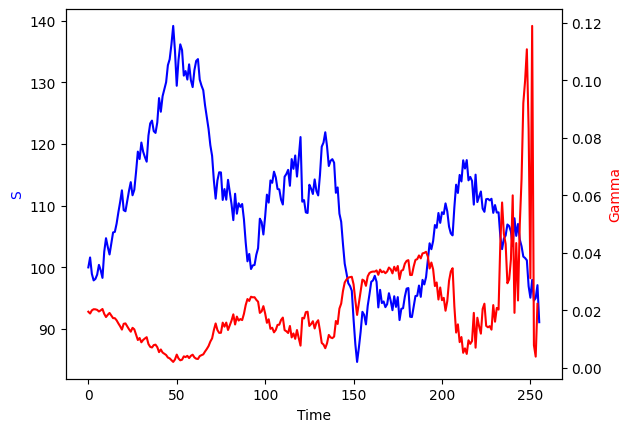

In [48]:

spot = pd.DataFrame(actual_pnl['S'].T[:, 6])
gamma = pd.DataFrame(replicating_portfolio.bs_gamma_i.T[:, 6])
fig, ax1 = plt.subplots()

# Plot the daily pnl on the primary axis
ax1.plot(spot, color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('S', color='blue')

# Create a secondary axis and plot the gamma on it
ax2 = ax1.twinx()
ax2.plot(gamma, color='red')
ax2.set_ylabel('Gamma', color='red')

plt.show()

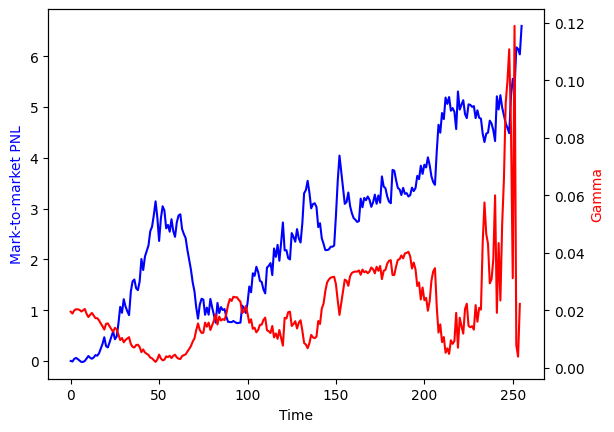

In [54]:
daily_pnl = pd.DataFrame(actual_pnl['PnL'].T[:, 6]).diff()
gamma = pd.DataFrame(replicating_portfolio.bs_gamma_i.T[:, 6])
fig, ax1 = plt.subplots()

# Plot the daily pnl on the primary axis
ax1.plot(daily_pnl, color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Mark-to-market PNL', color='blue')

# Create a secondary axis and plot the gamma on it
ax2 = ax1.twinx()
ax2.plot(gamma, color='red')
ax2.set_ylabel('Gamma', color='red')

plt.show()

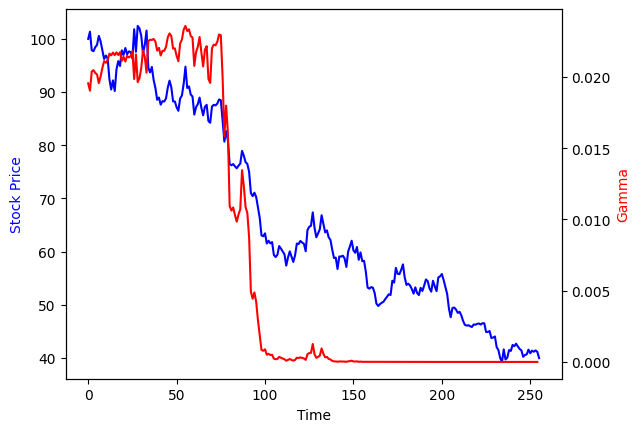

In [70]:

spot = pd.DataFrame(actual_pnl['S'].T[:, 50])
gamma = pd.DataFrame(replicating_portfolio.bs_gamma_i.T[:, 50])
fig, ax1 = plt.subplots()

# Plot the daily pnl on the primary axis
ax1.plot(spot, color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Stock Price', color='blue')

# Create a secondary axis and plot the gamma on it
ax2 = ax1.twinx()
ax2.plot(gamma, color='red')
ax2.set_ylabel('Gamma', color='red')

plt.show()

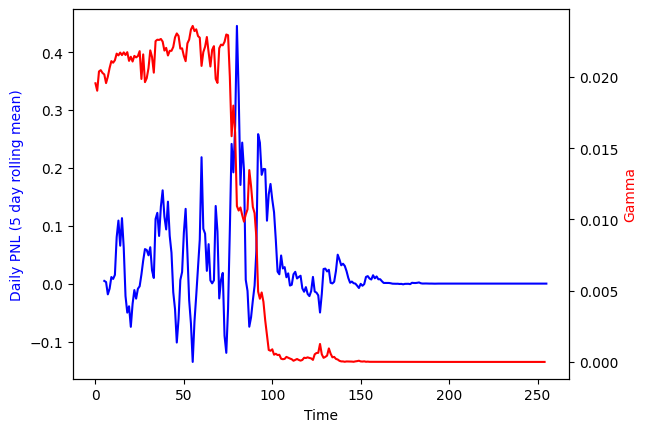

In [83]:
daily_pnl = pd.DataFrame(actual_pnl['PnL'].T[:, 50]).diff()
gamma = pd.DataFrame(replicating_portfolio.bs_gamma_i.T[:, 50])
fig, ax1 = plt.subplots()

# Plot the daily pnl on the primary axis
ax1.plot(daily_pnl.rolling(5).mean(), color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Daily PNL (5 day rolling mean)', color='blue')

# Create a secondary axis and plot the gamma on it
ax2 = ax1.twinx()
ax2.plot(gamma, color='red')
ax2.set_ylabel('Gamma', color='red')

plt.show()